In [482]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,joblib
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import zscore,boxcox

In [483]:
bdf=pd.read_csv('bigdatamart_Train.csv')

In [484]:
bdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [485]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [486]:
bdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


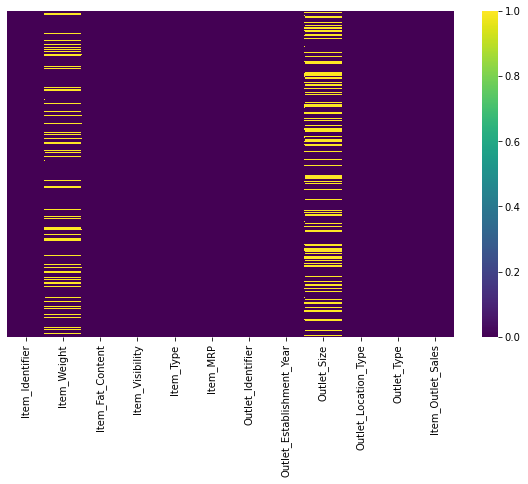

In [487]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf.isna(),yticklabels=False,cmap='viridis')
plt.show()

In [488]:
(sum(bdf['Outlet_Size'].isna())/bdf['Outlet_Size'].count())*100

39.424177981351214

In [489]:
(sum(bdf['Item_Weight'].isna())/bdf['Item_Weight'].count())*100

20.722379603399432

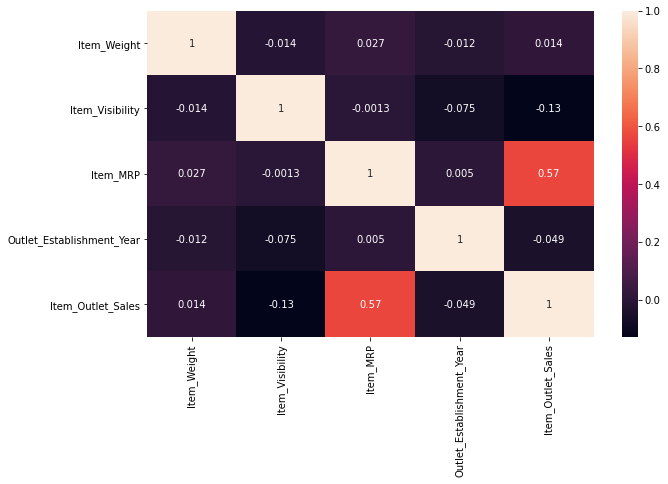

In [490]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf.corr(),annot=True)
plt.show()

In [491]:
si=SimpleImputer(strategy='most_frequent')

In [492]:
bdf.loc[:,'Outlet_Size']=si.fit_transform(bdf['Outlet_Size'].values.reshape(-1,1))

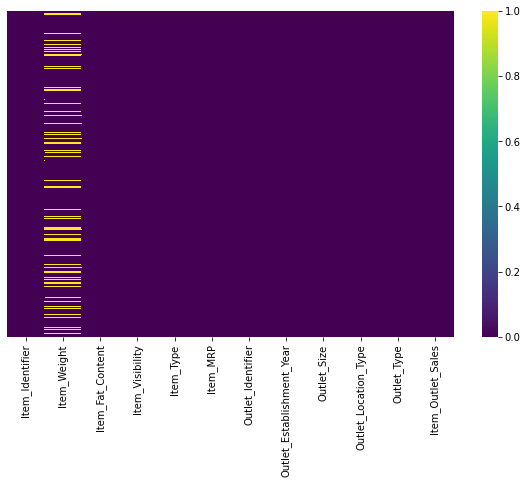

In [493]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf.isna(),yticklabels=False,cmap='viridis')
plt.show()

In [494]:
sn=SimpleImputer(strategy='mean')

In [495]:
bdf['Item_Weight']=sn.fit_transform(bdf['Item_Weight'].values.reshape(-1,1))

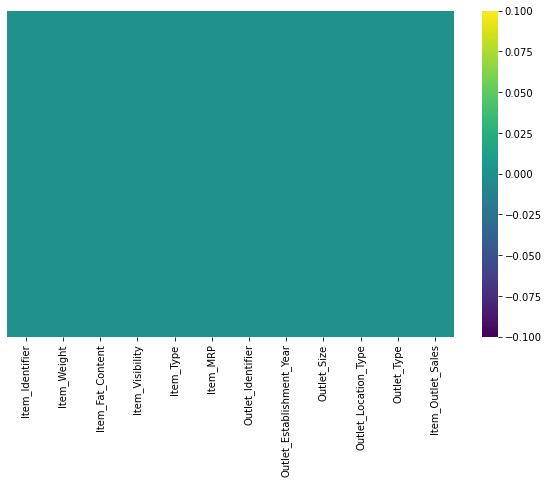

In [496]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf.isna(),yticklabels=False,cmap='viridis')
plt.show()

In [497]:
le=LabelEncoder()

In [498]:
for x in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    bdf.loc[:,x]=le.fit_transform(bdf.loc[:,x])

In [499]:
bdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [500]:
bdf.shape

(8523, 12)

In [501]:
zs=zscore(bdf,axis=1)
bdf=bdf[(zs<3).all(axis=1)]

In [502]:
bdf.shape

(6658, 12)

In [503]:
bdf.skew()

Item_Identifier             -0.246626
Item_Weight                  0.090642
Item_Fat_Content             1.012942
Item_Visibility              1.060464
Item_Type                    0.036577
Item_MRP                     0.194398
Outlet_Identifier           -0.091989
Outlet_Establishment_Year   -0.493980
Outlet_Size                 -0.091424
Outlet_Location_Type        -0.180359
Outlet_Type                  1.102729
Item_Outlet_Sales            0.395308
dtype: float64

In [504]:
for x in bdf.columns:
    if abs(bdf.loc[:,x].skew())>0.55:
        bdf.loc[:,x]=np.log1p(abs(bdf.loc[:,x]))

In [505]:
bdf.skew()

Item_Identifier             -0.246626
Item_Weight                  0.090642
Item_Fat_Content            -0.332342
Item_Visibility              0.923946
Item_Type                    0.036577
Item_MRP                     0.194398
Outlet_Identifier           -0.091989
Outlet_Establishment_Year   -0.493980
Outlet_Size                 -0.091424
Outlet_Location_Type        -0.180359
Outlet_Type                 -0.157362
Item_Outlet_Sales            0.395308
dtype: float64

In [506]:
sc=StandardScaler()

In [507]:
for x in bdf.columns:
    bdf[x]=sc.fit_transform(bdf[x].values.reshape(-1,1))

In [508]:
bdf.skew()

Item_Identifier             -0.246626
Item_Weight                  0.090642
Item_Fat_Content            -0.332342
Item_Visibility              0.923946
Item_Type                    0.036577
Item_MRP                     0.194398
Outlet_Identifier           -0.091989
Outlet_Establishment_Year   -0.493980
Outlet_Size                 -0.091424
Outlet_Location_Type        -0.180359
Outlet_Type                 -0.157362
Item_Outlet_Sales            0.395308
dtype: float64

In [509]:
bdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.578594,-0.819092,-0.475300,-0.998490,-0.775209,1.911711,1.463426,0.068267,-0.262071,-1.376054,-0.180694,1.465443
2,-0.435829,1.065367,-0.475300,-0.983050,0.675421,0.052253,1.463426,0.068267,-0.262071,-1.376054,-0.180694,0.061492
3,0.600790,1.456048,1.014987,-1.348998,-0.291666,0.747922,-1.721067,-0.053850,-0.262071,1.127162,-2.349598,-1.108468
4,0.998274,-0.904122,-0.475300,-1.348998,0.433649,-1.456000,-1.367235,-1.397140,-1.911285,1.127162,-0.180694,-0.883608
7,-0.264188,-0.001502,-0.475300,1.292512,1.400736,-0.529619,0.048095,-1.641375,-0.262071,1.127162,1.988210,1.711991


In [510]:
X=bdf.drop('Item_Outlet_Sales',axis=1)
y=bdf.loc[:,'Item_Outlet_Sales']

In [511]:
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        md_predict=md.predict(X_test)
        r2score=r2_score(y_test,md_predict)
        if max_score<r2score:
            max_score=r2score
            max_state=x
    print("Max random state is {} and r2score is {}".format(max_state,max_score))

In [512]:
model_select(LinearRegression)

Max random state is 81 and r2score is 0.45111651248262097


In [513]:
model_select(AdaBoostRegressor)

Max random state is 81 and r2score is 0.5070540186389714


In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=81)

In [515]:
param_ada={'n_estimators':[1,10,50,100,150,200]}
gscv=GridSearchCV(AdaBoostRegressor(),param_ada)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [1, 10, 50, 100, 150, 200]})

In [516]:
gscv.best_params_

{'n_estimators': 50}

In [517]:
ada=AdaBoostRegressor(n_estimators=50)
ada.fit(X_train,y_train)
ada_predict=ada.predict(X_test)

In [520]:
r2_score(y_test,ada_predict)

0.5015118633430261

In [521]:
bdf_test=pd.read_csv('bigdatamart_Test.csv')

In [522]:
bdf_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [523]:
bdf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


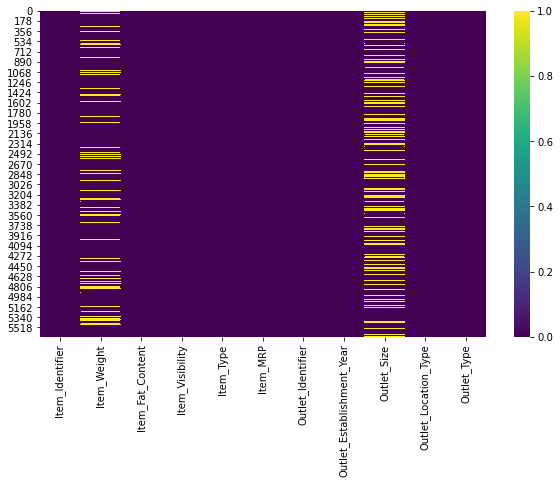

In [524]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf_test.isna(),cmap='viridis')
plt.show()

In [525]:
si=SimpleImputer(strategy='most_frequent')

In [526]:
bdf_test.loc[:,'Outlet_Size']=si.fit_transform(bdf_test.loc[:,'Outlet_Size'].values.reshape(-1,1))

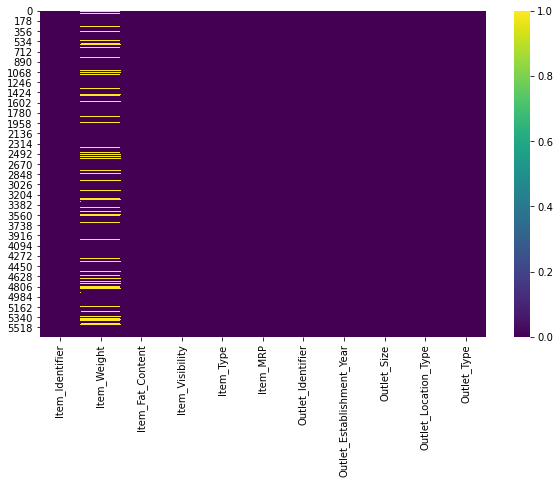

In [527]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf_test.isna(),cmap='viridis')
plt.show()

In [528]:
sn=SimpleImputer(strategy='mean')
bdf_test.loc[:,'Item_Weight']=sn.fit_transform(bdf_test.loc[:,'Item_Weight'].values.reshape(-1,1))

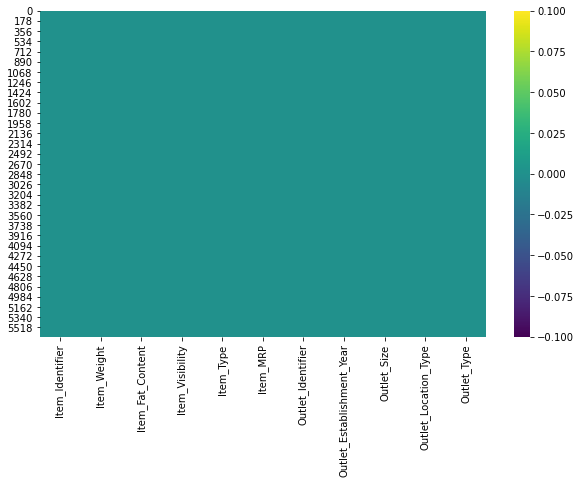

In [529]:
plt.figure(figsize=(10,6))
sns.heatmap(bdf_test.isna(),cmap='viridis')
plt.show()

In [530]:
for x in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    bdf_test[x]=le.fit_transform(bdf_test[x])

In [531]:
bdf_test.shape

(5681, 11)

In [532]:
zs=zscore(bdf_test)
bdf_test=bdf_test[(zs<3).all(axis=1)]

In [533]:
bdf_test.shape

(5525, 11)

In [534]:
bdf_test.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.786385
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                  0.949783
dtype: float64

In [535]:
for x in bdf_test.columns:
    if abs(bdf_test[x].skew())>0.55:
        bdf_test.loc[:,x]=np.log1p(bdf_test.loc[:,x].values.ravel())

In [536]:
bdf_test.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.701178
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                 -0.221555
dtype: float64

In [537]:
sct=StandardScaler()

In [538]:
bdf_test_scale=sct.fit_transform(bdf_test)

In [539]:
bdf_test=pd.DataFrame(bdf_test_scale,columns=bdf_test.columns)

In [540]:
bdf_test.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.701178
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                 -0.221555
dtype: float64

In [541]:
bdf_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.732778,1.888027,-0.586944,-1.234839,1.363550,-0.540471,1.499453,0.127022,-0.277309,-1.379461,-0.120201
1,1.410097,0.444602,-0.586944,0.819216,0.889051,1.628429,-1.681990,0.007343,-0.277309,1.092251,-2.079239
2,0.075578,-1.265212,-0.586944,-1.053030,1.363550,0.223662,-0.975003,1.084453,-0.277309,-0.143605,-0.120201
3,0.913844,-0.002359,1.186082,1.222415,-0.771694,1.506551,0.085478,-1.548482,-0.277309,1.092251,1.838838
4,-0.702332,-0.681974,1.186082,0.042132,-0.297195,-0.390031,1.145959,-0.112336,1.391679,-1.379461,-0.120201


In [542]:
ada=AdaBoostRegressor(n_estimators=10)
ada.fit(X,y)
ada_predict_final=ada.predict(bdf_test)

In [543]:
joblib.dump(ada,'AdaBooster_BigDart.joblib')

['AdaBooster_BigDart.joblib']